In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D , MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
from PIL import Image
from sklearn.metrics import confusion_matrix
import itertools
warnings.filterwarnings('ignore')
import keras
from sklearn.model_selection import StratifiedKFold

## Reading data

In [2]:
cur_path = r'D:\gtsbr'

In [3]:
data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            
            data.append([image,i])
        except:
            print("error loading image")

In [4]:
x = []
y = []

for features, labels in data:
    x.append(features)
    y.append(labels)

In [5]:
x = np.array(x)
y = np.array(y)

In [6]:
X_train, X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=22)

## before scaling

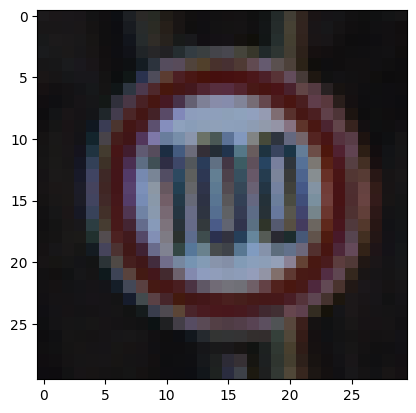

In [7]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

## scaling

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [9]:
X_train.shape

(31367, 30, 30, 3)

In [10]:
X_test.shape

(7842, 30, 30, 3)

In [11]:
y_train.shape

(31367,)

In [12]:
y_train.shape

(31367,)

In [13]:
y_train[0]

7

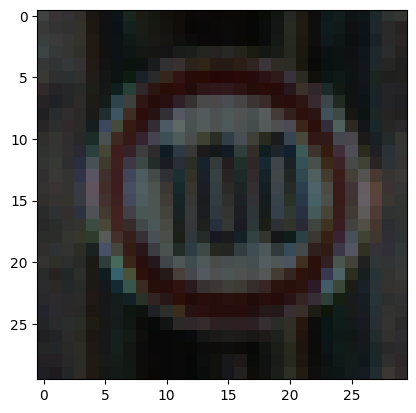

In [14]:
plt.imshow(X_train[0],cmap=plt.cm.binary)

## Model building

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1000,activation=tf.nn.relu))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(500,activation=tf.nn.relu))


model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(43,activation=tf.nn.softmax))


model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
r = model.fit(X_train,y_train,epochs=10)


Epoch 1/10
981/981 [==============================] - 19s 18ms/step - loss: 1.3190 - accuracy: 0.6529
Epoch 2/10
981/981 [==============================] - 17s 17ms/step - loss: 0.5358 - accuracy: 0.8541
Epoch 3/10
981/981 [==============================] - 18s 19ms/step - loss: 0.3852 - accuracy: 0.8937
Epoch 4/10
981/981 [==============================] - 21s 21ms/step - loss: 0.3177 - accuracy: 0.9141
Epoch 5/10
981/981 [==============================] - 21s 21ms/step - loss: 0.2691 - accuracy: 0.9277
Epoch 6/10
981/981 [==============================] - 21s 21ms/step - loss: 0.2373 - accuracy: 0.9349
Epoch 7/10
981/981 [==============================] - 21s 21ms/step - loss: 0.2134 - accuracy: 0.9414
Epoch 8/10
981/981 [==============================] - 21s 21ms/step - loss: 0.1999 - accuracy: 0.9443
Epoch 9/10
981/981 [==============================] - 21s 21ms/step - loss: 0.1836 - accuracy: 0.9499
Epoch 10/10
981/981 [==============================] - 20s 20ms/step - loss: 0.175

In [17]:
loss ,acc = model.evaluate(X_test,y_test)


246/246 [==============================] - 2s 8ms/step - loss: 0.1968 - accuracy: 0.9470


## cross validation

In [18]:
k_folds = 5


kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)


accuracy_per_fold = []
for train_index, test_index in kf.split(X_train, y_train):  
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1000,activation=tf.nn.relu)) 
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(500,activation=tf.nn.relu))


    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(43,activation=tf.nn.softmax))


    model.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    model.fit(X_train_fold,y_train_fold,epochs=25,verbose=0)

    scores = model.evaluate(X_test,y_test,verbose=0)
    print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))
    accuracy_per_fold.append(scores[1] * 100)
    
print("%.2f%%" % (np.mean(accuracy_per_fold)))

accuracy: 94.99%
accuracy: 96.30%
accuracy: 94.06%
accuracy: 94.12%
accuracy: 95.04%
94.90%


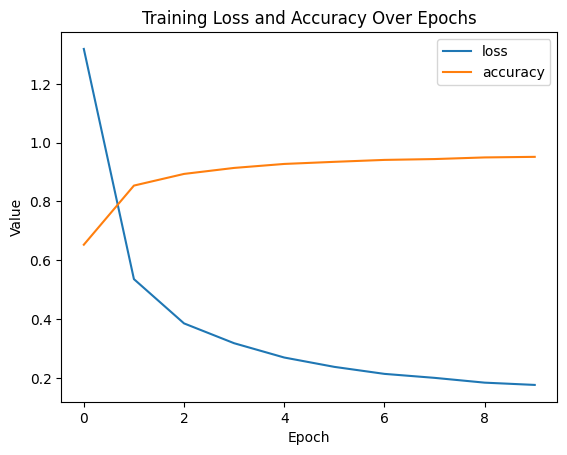

In [19]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['accuracy'],label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy Over Epochs')
plt.legend()


## plotting loss and accuracy of test set

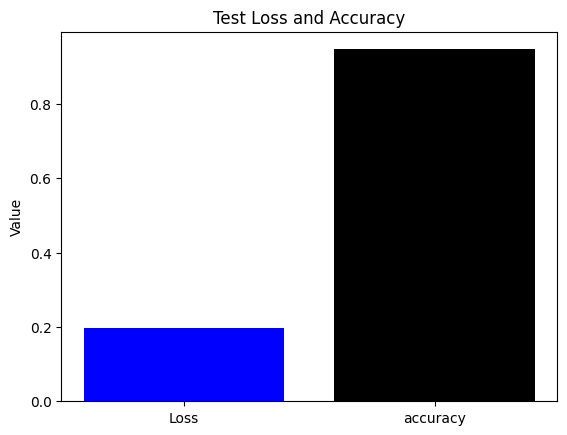

In [20]:
plt.bar(['Loss', 'accuracy'], [loss, acc], color=['blue', 'black'])
plt.ylabel('Value')
plt.title('Test Loss and Accuracy')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix
import itertools

In [22]:
def plot_confusion_matrix(cm,classes,normalize=False,title="confusion Matrix",cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 8))
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
        
    else:
        print("Confusion matrix without normalization")
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment = 'center',
                color = "white" if cm[i,j] > thresh else "black", fontsize=8)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('perdicted label')
    plt.show()

246/246 [==============================] - 5s 9ms/step
Confusion matrix without normalization
[[ 42   0   0 ...   0   0   0]
 [  0 397   0 ...   0   0   0]
 [  0  29 334 ...   0   0   0]
 ...
 [  0   0   0 ...  70   0   0]
 [  0   0   0 ...   0  52   0]
 [  0   0   0 ...   0   0  46]]


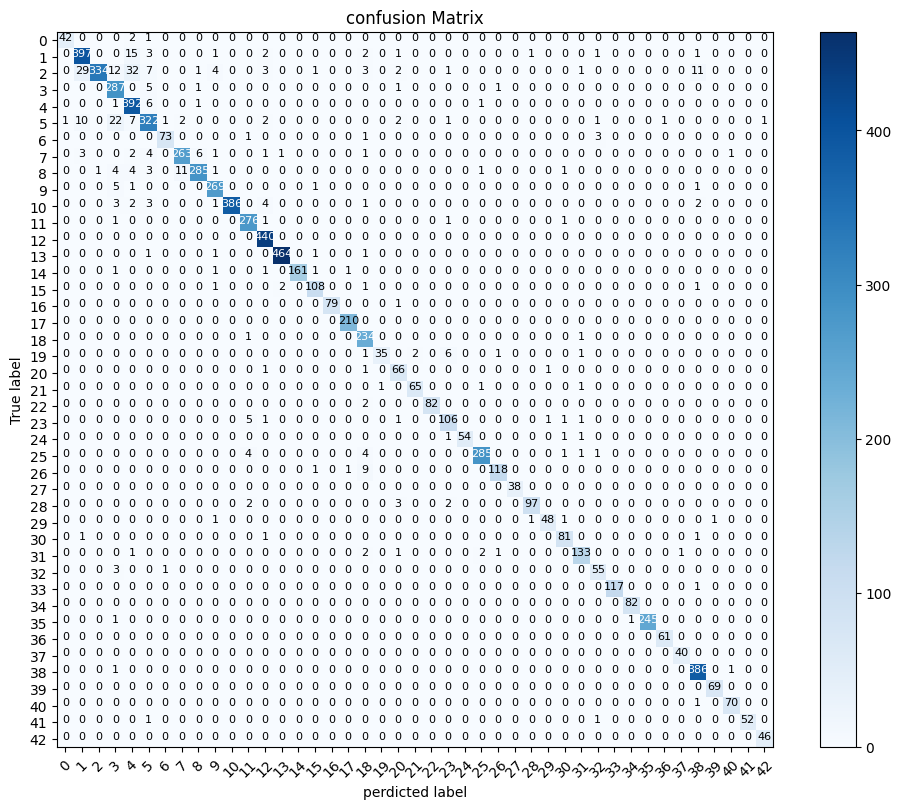

In [23]:
p_test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(43)))

In [24]:
def process_image(image_path):
    img = Image.open(image_path)
    img = img.resize((30,30))
    img_array  = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = tf.keras.utils.normalize(img_array, axis=1)
    return img_array

In [25]:
def predict_image_category(mod,image_path,categories):
    img_array = process_image(image_path)
    
    predicitions = mod.predict(img_array)
    
    predicted_class_index = tf.argmax(predicitions[0]).numpy()
    
    predicted_class_name = categories[predicted_class_index]
    
    img = Image.open(image_path)
    plt.imshow(img)
    print(predicted_class_index)
    plt.title(f"Predicted Category: {predicted_class_name}")
    plt.show()

In [26]:
CATEGORIES = [str(i) for i in range(43)]

1/1 [==============================] - 0s 33ms/step
1


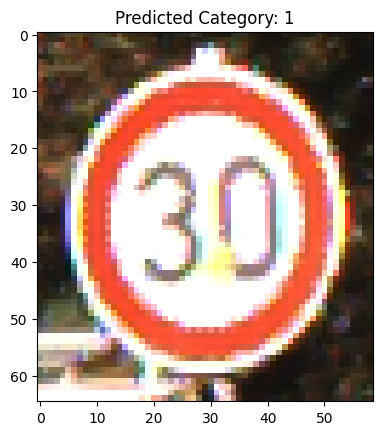

In [36]:
predict_image_category(model,'./Test/00024.png',CATEGORIES)


## CNN

In [28]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(30,30,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1000,activation='relu'),
    
    tf.keras.layers.Dense(43,activation='softmax')
    
    
    
])

In [29]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [30]:
l = cnn.fit(X_train,y_train,epochs=10)


Epoch 1/10
981/981 [==============================] - 15s 14ms/step - loss: 1.1479 - accuracy: 0.6753
Epoch 2/10
981/981 [==============================] - 14s 14ms/step - loss: 0.1908 - accuracy: 0.9431
Epoch 3/10
981/981 [==============================] - 14s 14ms/step - loss: 0.1026 - accuracy: 0.9691
Epoch 4/10
981/981 [==============================] - 15s 15ms/step - loss: 0.0684 - accuracy: 0.9798
Epoch 5/10
981/981 [==============================] - 15s 15ms/step - loss: 0.0520 - accuracy: 0.9844
Epoch 6/10
981/981 [==============================] - 15s 15ms/step - loss: 0.0396 - accuracy: 0.9878
Epoch 7/10
981/981 [==============================] - 15s 16ms/step - loss: 0.0317 - accuracy: 0.9899
Epoch 8/10
981/981 [==============================] - 15s 15ms/step - loss: 0.0266 - accuracy: 0.9919
Epoch 9/10
981/981 [==============================] - 15s 15ms/step - loss: 0.0227 - accuracy: 0.9932
Epoch 10/10
981/981 [==============================] - 15s 15ms/step - loss: 0.019

In [31]:
loss2 , acc2 = cnn.evaluate(X_test,y_test)


246/246 [==============================] - 2s 8ms/step - loss: 0.0495 - accuracy: 0.9895


In [32]:
loss2 , acc2


(0.04952628165483475, 0.9895434975624084)

## confustion matrix for cnn

246/246 [==============================] - 5s 10ms/step
Confusion matrix without normalization
[[ 42   2   0 ...   0   0   0]
 [  0 417   4 ...   0   0   0]
 [  0   1 439 ...   0   0   0]
 ...
 [  0   0   0 ...  68   0   0]
 [  0   0   0 ...   0  54   0]
 [  0   0   0 ...   0   0  46]]


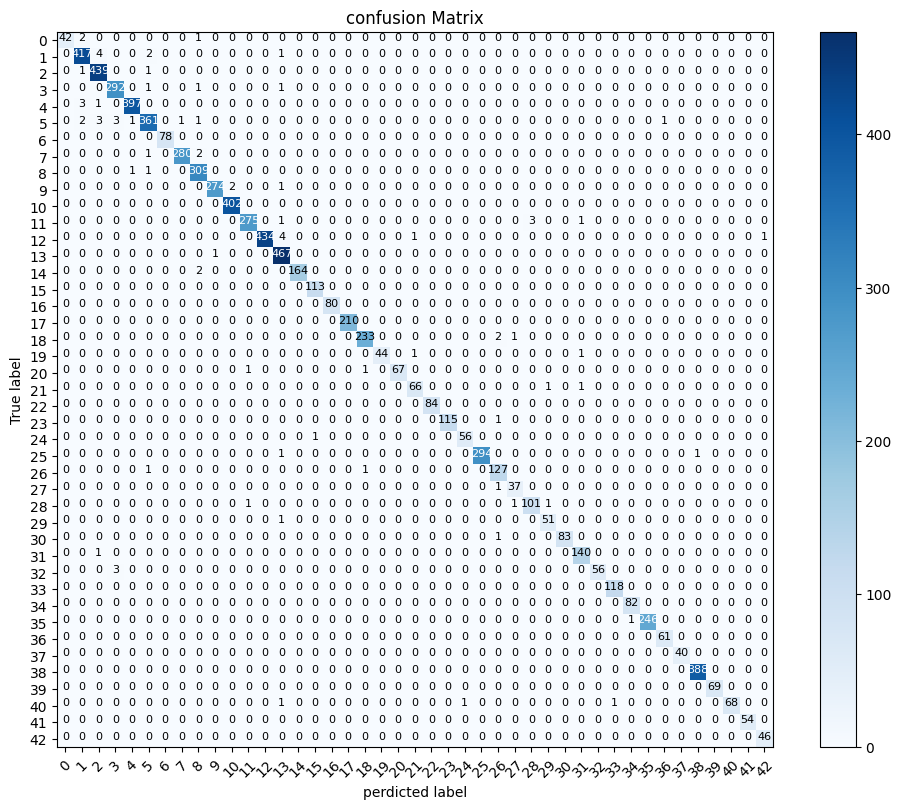

In [39]:
p_test = cnn.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(43)))

In [37]:
cnn.save('model.h5')

## Plotting loss and accuracy difference between ann and cnn

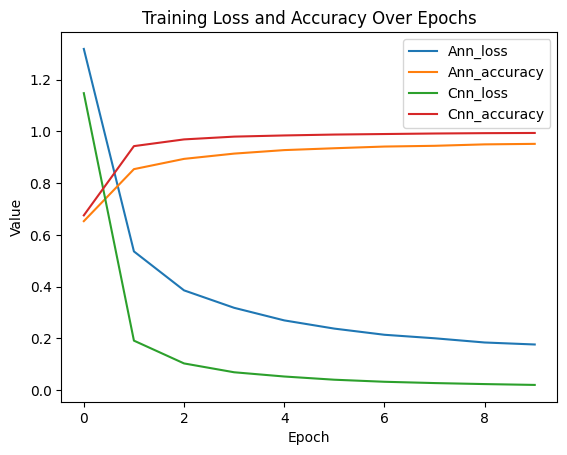

In [33]:
plt.plot(r.history['loss'],label='Ann_loss')
plt.plot(r.history['accuracy'],label='Ann_accuracy')
plt.plot(l.history['loss'],label='Cnn_loss')
plt.plot(l.history['accuracy'],label='Cnn_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy Over Epochs')
plt.legend()

## plotting accuracy difference between ann and cnn


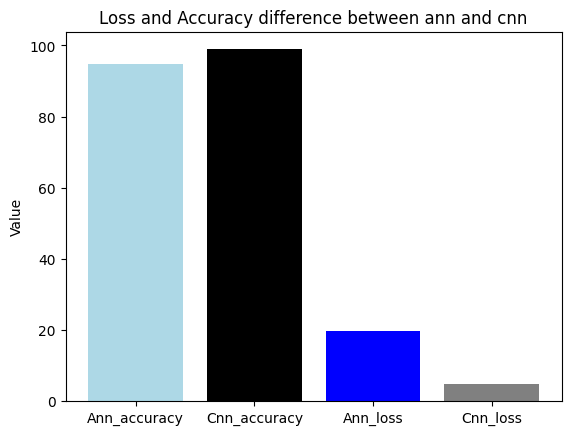

In [34]:
plt.bar(['Ann_accuracy', 'Cnn_accuracy'], [acc * 100, acc2 *100], color=['lightblue', 'black'])
plt.bar(['Ann_loss', 'Cnn_loss'], [loss*100, loss2*100], color=['blue', 'gray'])

plt.ylabel('Value')
plt.title('Loss and Accuracy difference between ann and cnn')
plt.show()
